# Crude Oil Price Prediction

In [1]:
#Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Import Dataset
df=pd.read_csv('D:\Dataset\crude oil us 2015 to 2021.csv')

In [4]:
df.head()

,Date,Price
0,02-01-2015,52.72
1,05-01-2015,50.05
2,06-01-2015,47.98
3,07-01-2015,48.69
4,08-01-2015,48.80


# EDA

In [5]:
df.shape

(1725, 2)

In [6]:
df.info

<bound method DataFrame.info of             Date  Price
0     02-01-2015  52.72
1     05-01-2015  50.05
2     06-01-2015  47.98
3     07-01-2015  48.69
4     08-01-2015  48.80
...          ...    ...
1720  09-11-2021  84.12
1721  10-11-2021  81.23
1722  11-11-2021  81.47
1723  12-11-2021  80.87
1724  15-11-2021  80.85

[1725 rows x 2 columns]>

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Date,Price


In [8]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [9]:
df.dtypes

Date      object
Price    float64
dtype: object

count    1725.000000
mean       52.793890
std        12.173029
min       -36.980000
25%        45.550000
50%        52.250000
75%        60.970000
max        85.640000
Name: Price, dtype: float64


D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


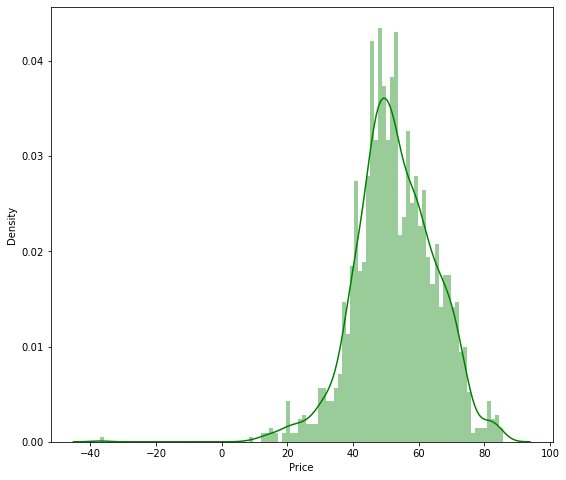

In [10]:
print(df['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

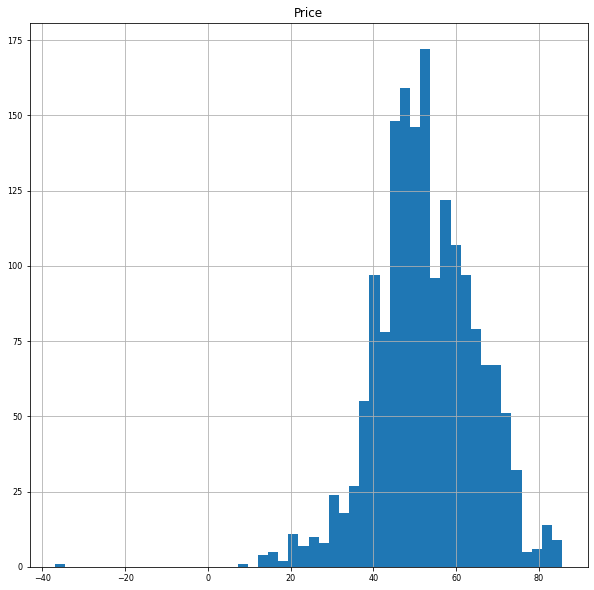

In [11]:
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<AxesSubplot:>

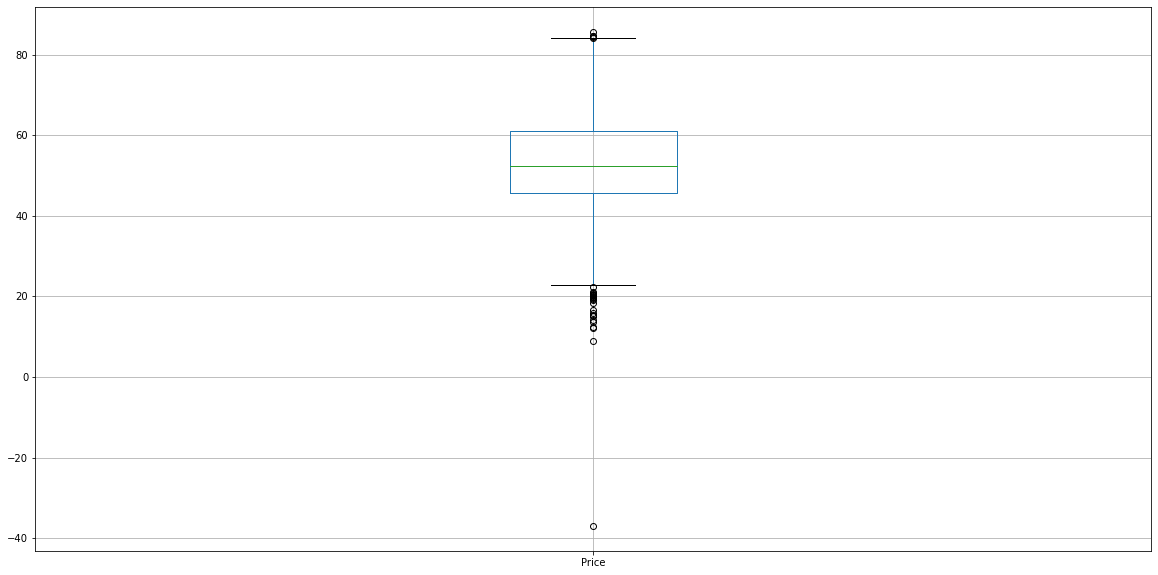

In [12]:
df[['Price']].boxplot()

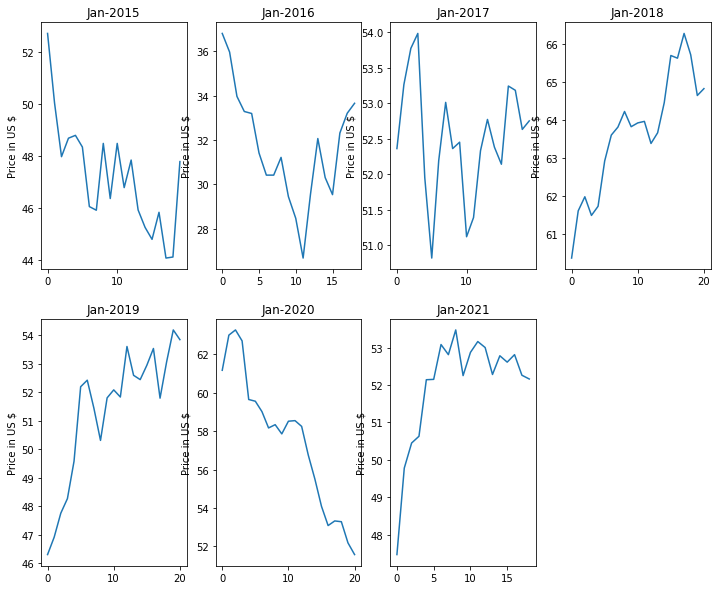

In [13]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[1]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])
#for month of Jan there seems to be a increasing in crude oil prices in last 7 years except for year 2020, this may be due to covid-19

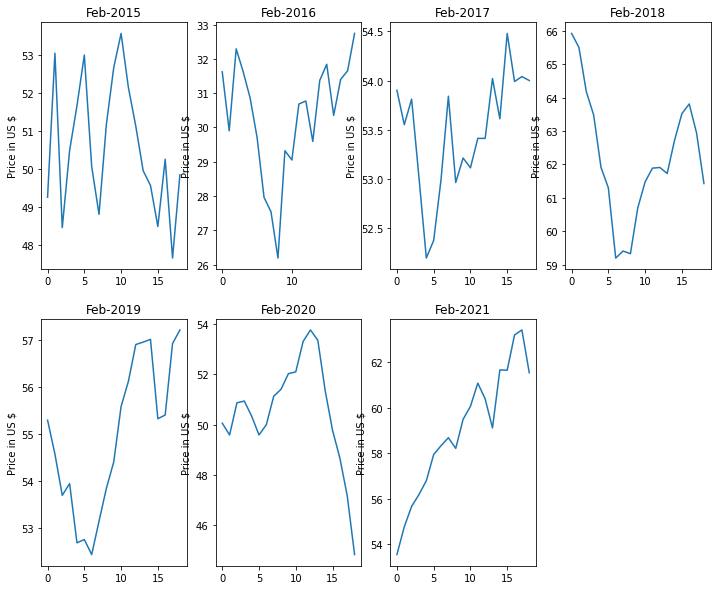

In [14]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[2]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])
#for feb there seems to be no evident trend in oil prices

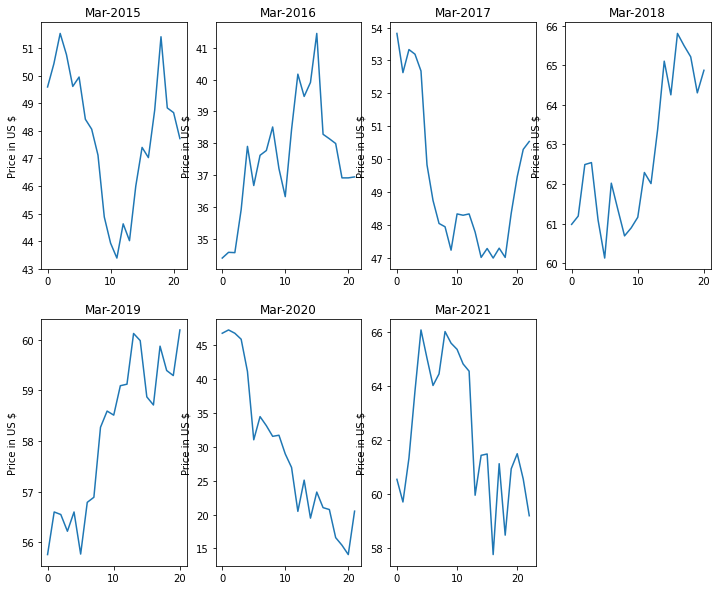

In [15]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[3]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

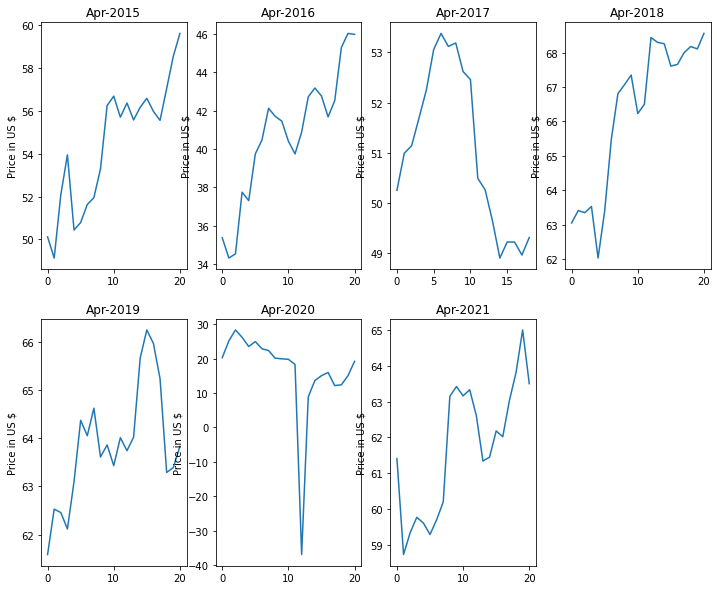

In [16]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[4]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

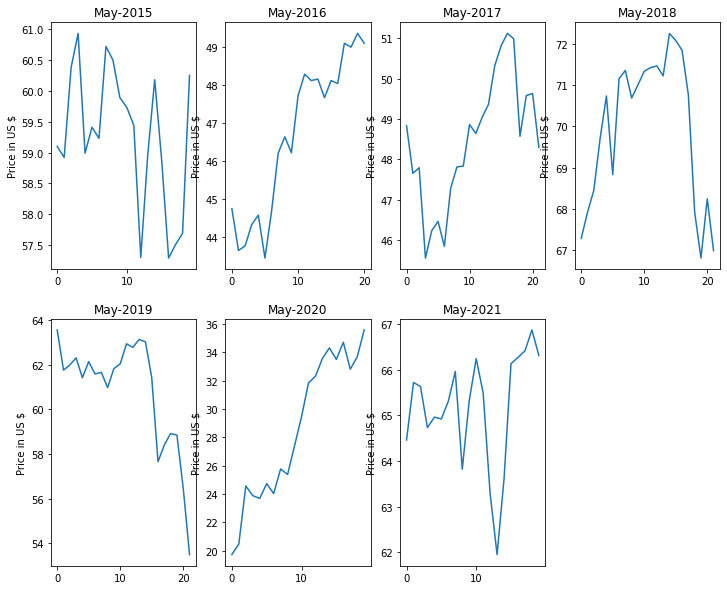

In [17]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[5]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

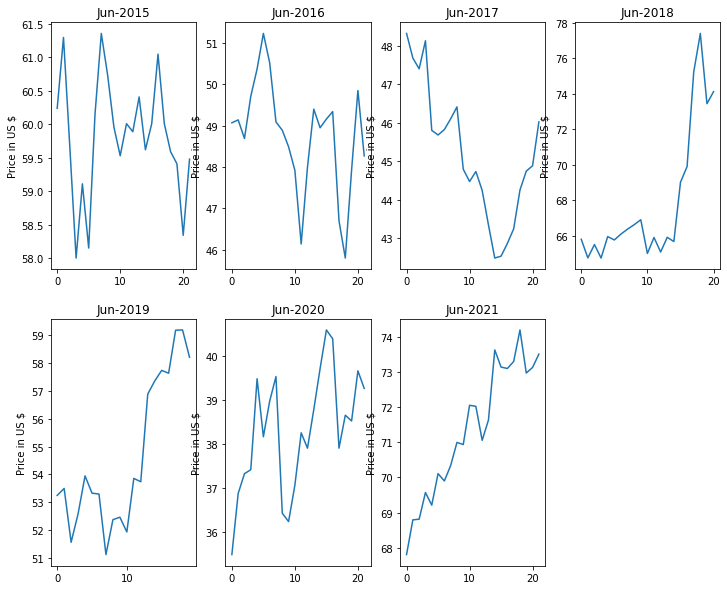

In [18]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[6]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

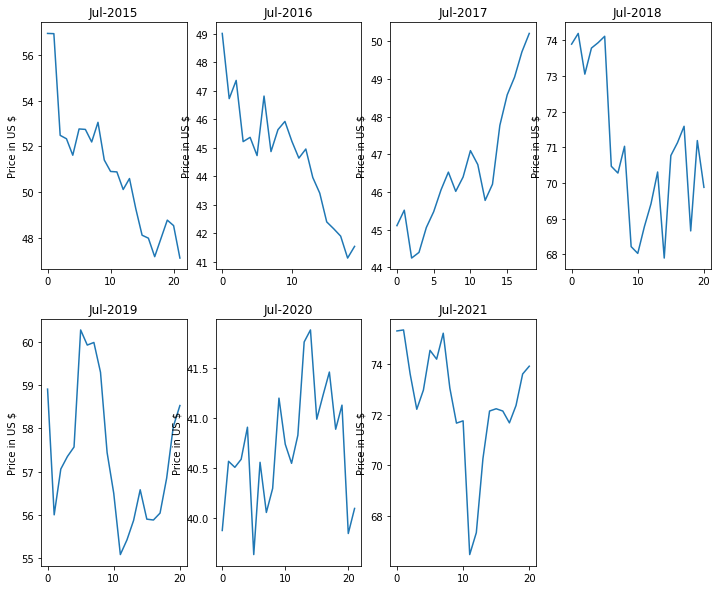

In [19]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[7]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

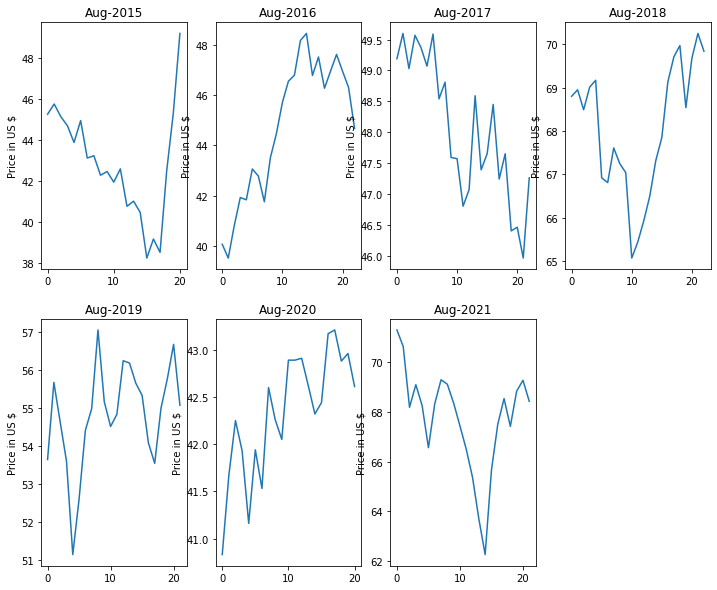

In [20]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[8]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

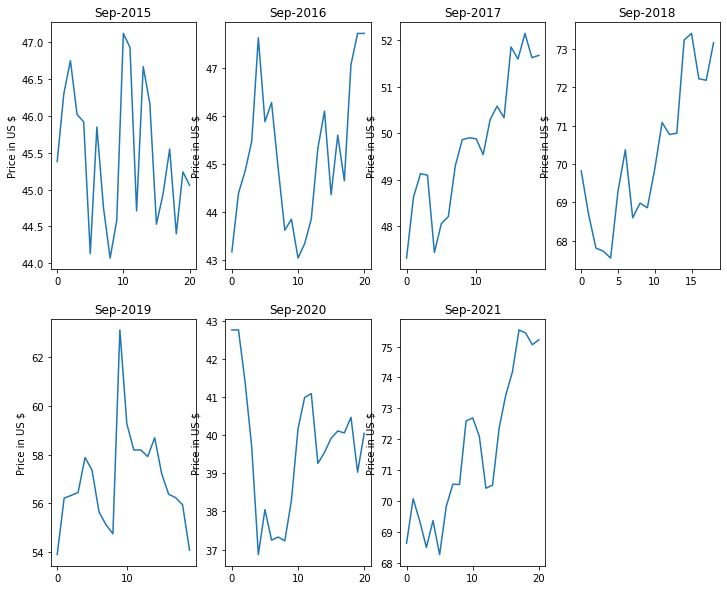

In [21]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[9]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

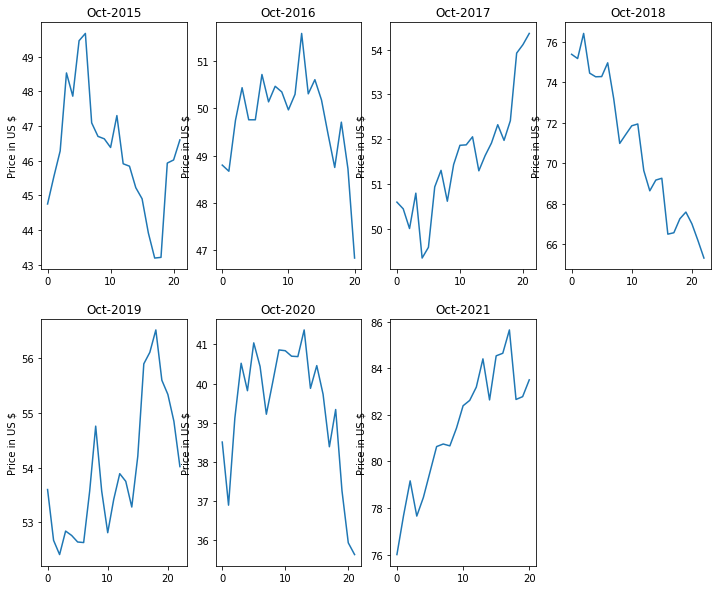

In [22]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[10]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

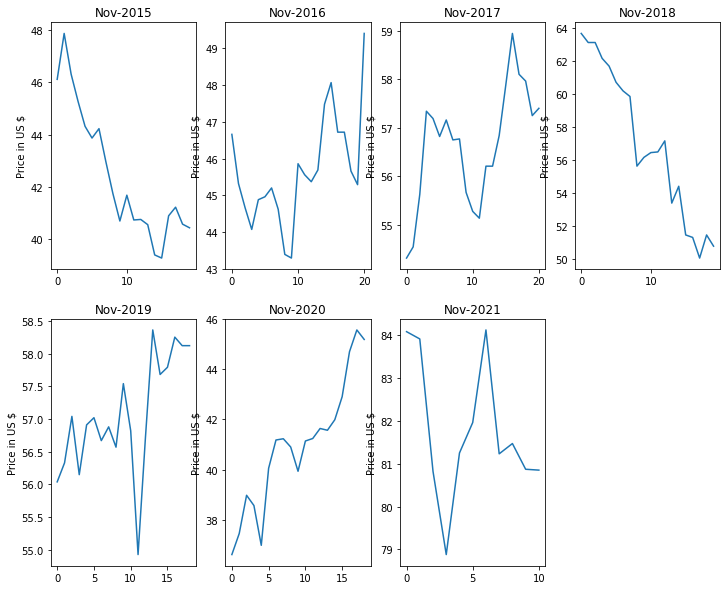

In [23]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[11]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

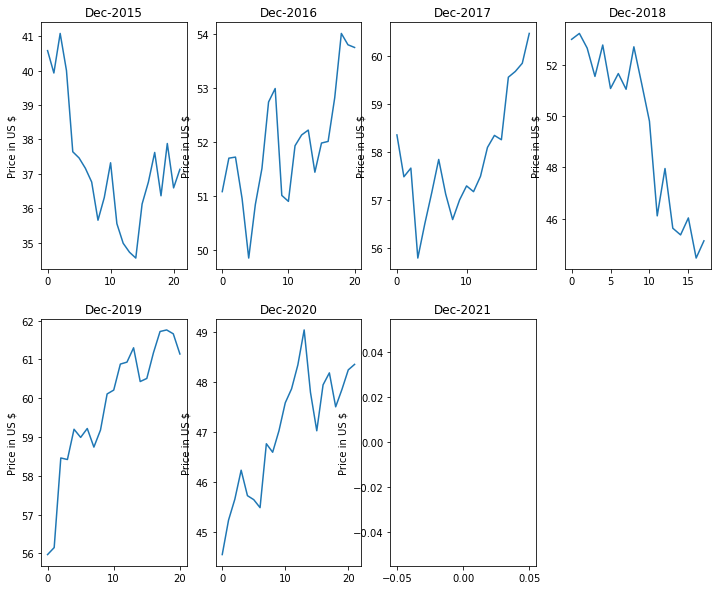

In [24]:
import datetime
l_15,l_16,l_17,l_18,l_19,l_20,l_21=[],[],[],[],[],[],[] #these list corresponds to year 2015,2016,2017,2018,2019,2020,2021
months=[12]
for j in months:
  for i in range(df.shape[0]):
    a=df['Date'][i]
    dtm=datetime.datetime.strptime(a,'%d-%m-%Y')
    if dtm.year==2015:
      if dtm.month==j:
        l_15.append(df['Price'][i])
    elif dtm.year==2016:
      if dtm.month==j:
        l_16.append(df['Price'][i])
    elif dtm.year==2017:
      if dtm.month==j:
        l_17.append(df['Price'][i])
    elif dtm.year==2018:
      if dtm.month==j:
        l_18.append(df['Price'][i])
    elif dtm.year==2019:
      if dtm.month==j:
        l_19.append(df['Price'][i])
    elif dtm.year==2020:
      if dtm.month==j:
        l_20.append(df['Price'][i])
    elif dtm.year==2021:
      if dtm.month==j:
        l_21.append(df['Price'][i])
  a=[l_15,l_16,l_17,l_18,l_19,l_20,l_21]
  b=['2015','2016','2017','2018','2019','2020','2021']
  plt.figure(figsize=(12,10))
  for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(a[i])
    plt.ylabel('Price in US $')
    month_number = str(j)
    datetime_object = datetime.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%b")
    plt.title(month_name+'-'+b[i])

Upper whisker:  84.1
Lower Whisker:  22.419999999999995


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


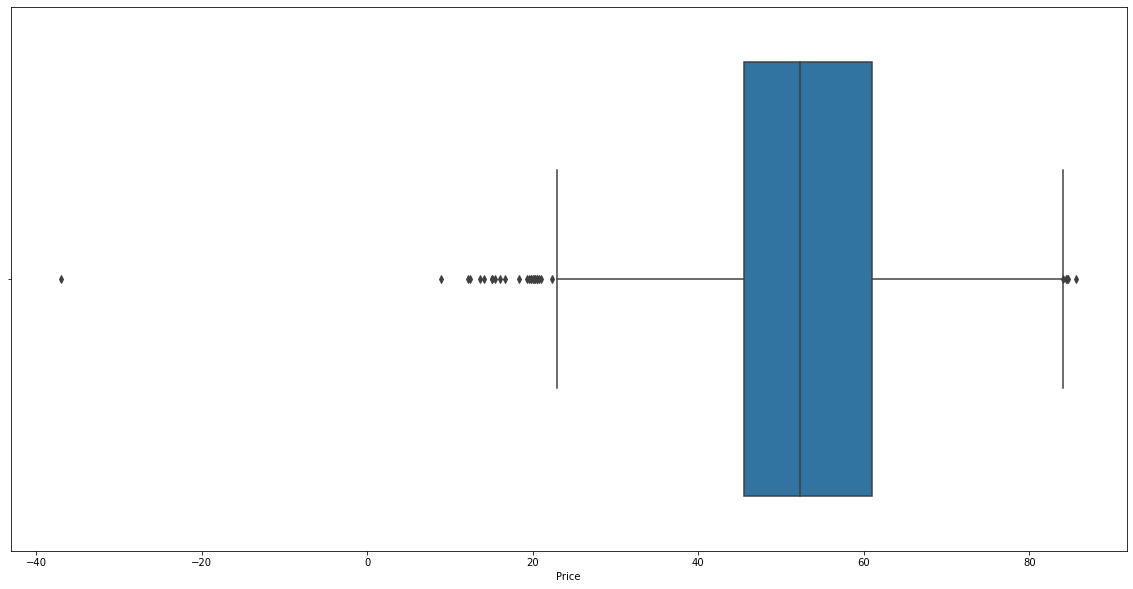

In [25]:
sns.boxplot(df['Price'])
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

# Model Building[ARIMA Model]

ARIMA is a model that can be fitted to time series data to predict future points in the series. We can split the ARIMA term into three terms, AR, I, MA: AR(p) stands for the auto regressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead. I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary. MA(q) stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation.

In [26]:
new_df = df[(df['Price'] > lower) & (df['Price'] < upper)]

In [27]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Price")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  89.31297586864379
Lower Limit:  16.274803841501125


In [28]:
df[(df['Price'] < lower_limit) | (df['Price'] > upper_limit)]#Outlayers

,Date,Price
1312,27-03-2020,15.48
1313,30-03-2020,14.10
1327,20-04-2020,-36.98
1328,21-04-2020,8.91
1329,22-04-2020,13.64
1330,23-04-2020,15.06
1331,24-04-2020,15.99
1332,27-04-2020,12.17
1333,28-04-2020,12.40
1334,29-04-2020,15.04


In [29]:
new_df = df[(df['Price'] > lower) & (df['Price'] < upper)]
new_df.head(5)

,Date,Price
0,02-01-2015,52.72
1,05-01-2015,50.05
2,06-01-2015,47.98
3,07-01-2015,48.69
4,08-01-2015,48.80


In [30]:
new_df.shape

(1695, 2)

<AxesSubplot:>

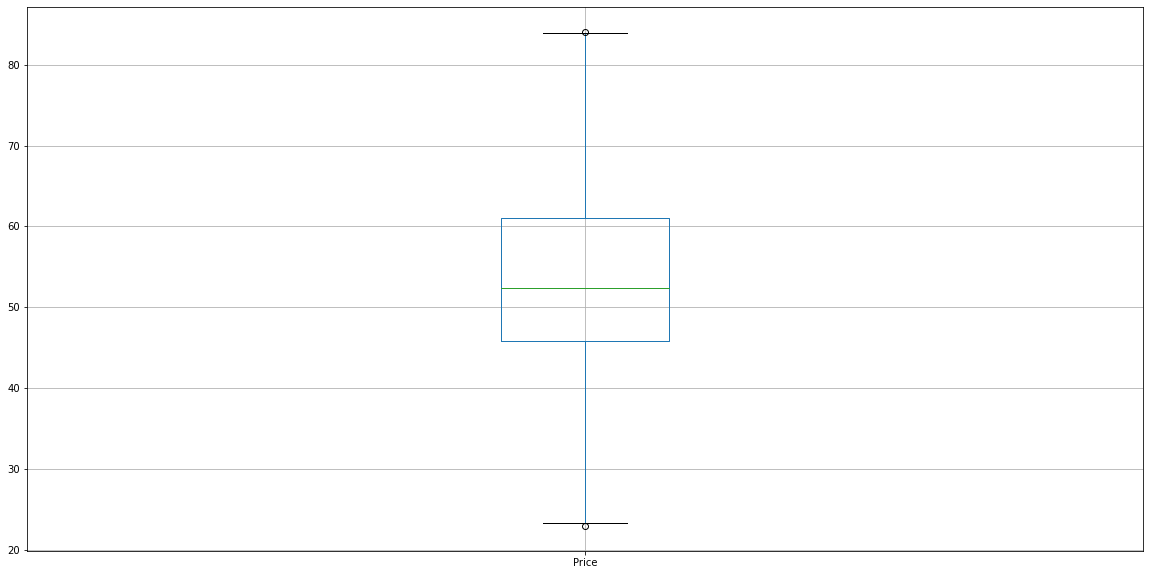

In [31]:
new_df[['Price']].boxplot()

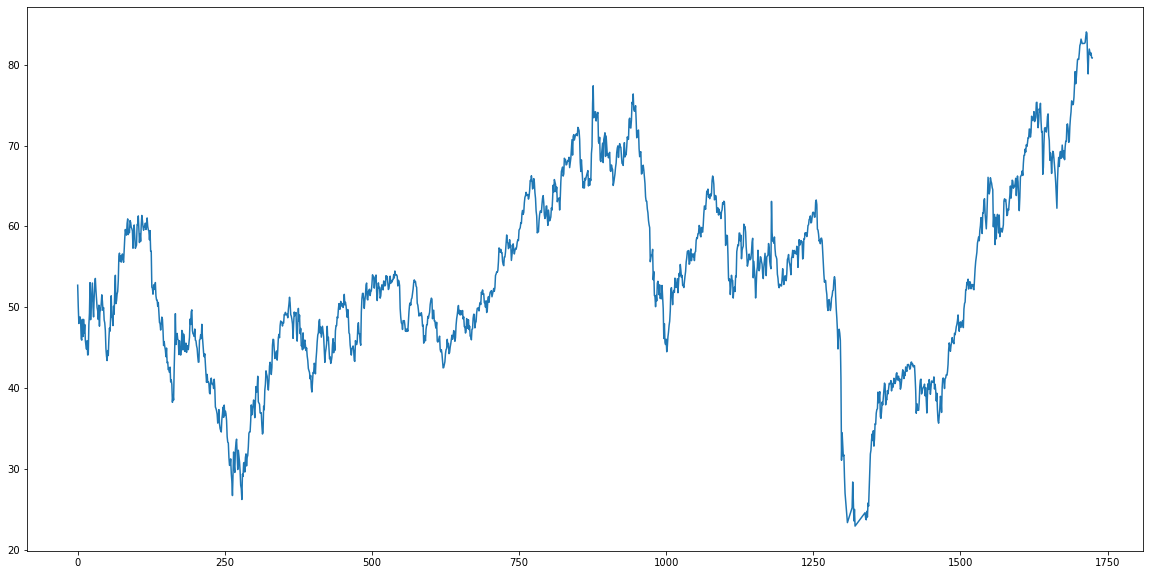

In [32]:
plt.plot(new_df["Price"],label='Price History')

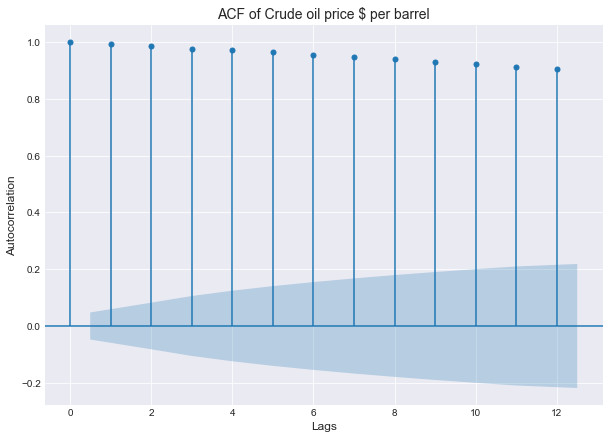

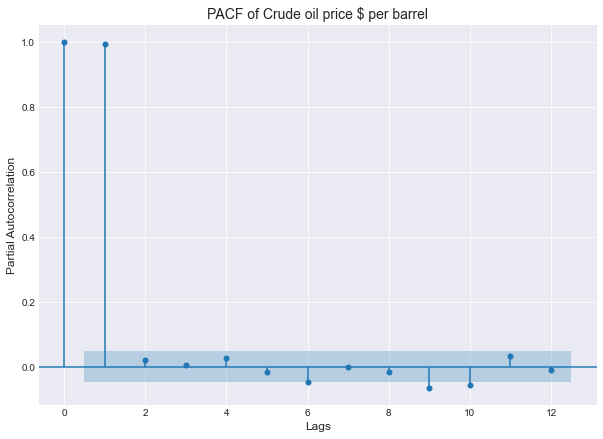

In [33]:
plt.style.use('seaborn-darkgrid')
# Import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 
plt.rc("figure", figsize=(10, 7))
# Plot ACF of Crude oil price $ per barrel for past 40 lags
plot_acf(new_df['Price'], lags=12)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('ACF of Crude oil price $ per barrel', fontsize=14)
plt.show()
# Plot PACF of Crude oil price $ per barrel for past 40 lags
plot_pacf(new_df['Price'], lags=12)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title('PACF of Crude oil price $ per barrel', fontsize=14)
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(new_df['Price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -1.595157
p-value                           0.486026
#Lags Used                        0.000000
Number of Observations Used    1694.000000
Critical Value (1%)              -3.434216
Critical Value (5%)              -2.863248
Critical Value (10%)             -2.567679
dtype: float64


In [35]:
from statsmodels.tsa.stattools import adfuller
x=new_df['Price']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.5951573887473245
p-value 0.4860256477961919
critical values 5386.887555016727
Reject the null hypotheise , it mean data is not stationary


In [36]:
new_df['Price first difference']=new_df['Price']-new_df['Price'].shift(1)

<ipython-input-36-af80f040fde4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price first difference']=new_df['Price']-new_df['Price'].shift(1)


<AxesSubplot:>

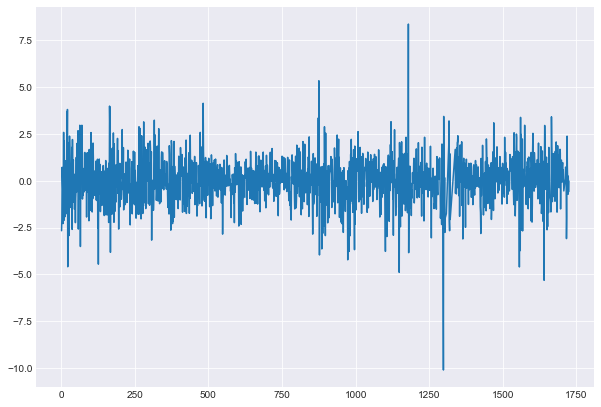

In [37]:
new_df['Price first difference'].plot()

In [38]:
x=new_df['Price first difference'].dropna() 
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -12.148870937796392
p-value 1.5872685804648358e-22
critical values 5379.865989770822
fail to reject null hypothese h1 , it mean data is stationary


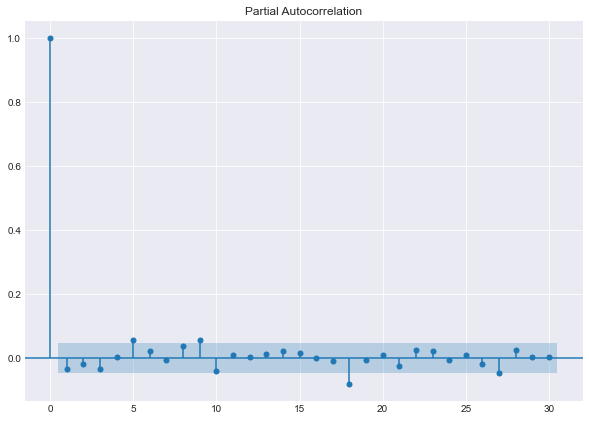

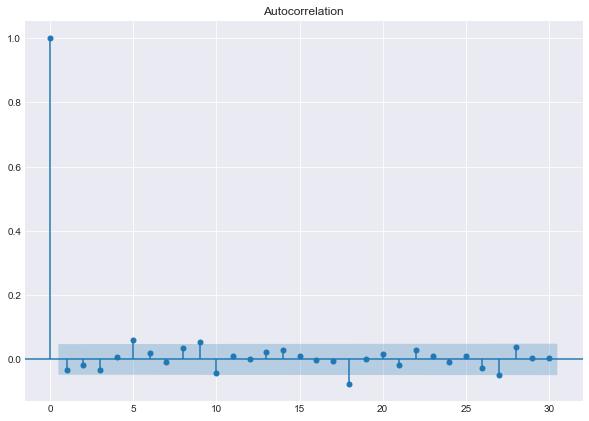

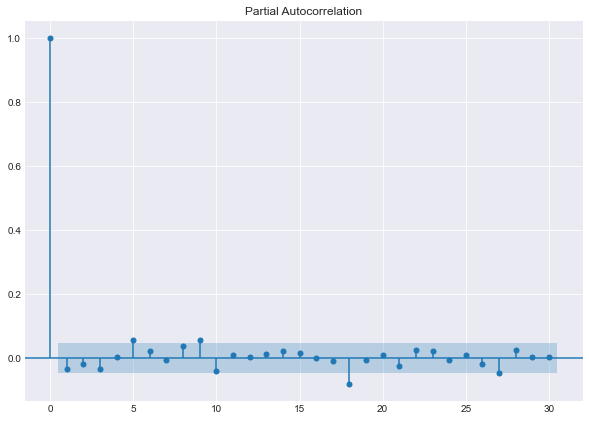

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(new_df['Price first difference'].iloc[1:],lags=30)
plot_pacf(new_df['Price first difference'].iloc[1:],lags=30)

In [40]:
# separate out a validation dataset
split_point = len(new_df) - 10
dataset, validation = new_df[0:split_point], new_df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1685, Validation 10


In [41]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
#train = pd.read_csv('crude oil us 2015 to 2021 (1).csv', header=0, index_col=0, parse_dates=True, squeeze=True)
train=new_df['Price']
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

In [42]:
train

array([52.72, 50.05, 47.98, ..., 57.92, 58.69, 57.22], dtype=float32)

In [43]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

Predicted=57.220, Expected=56.380
Predicted=56.380, Expected=56.240
Predicted=56.240, Expected=55.950
Predicted=55.950, Expected=54.090
Predicted=54.090, Expected=53.600
Predicted=53.600, Expected=52.670
Predicted=52.670, Expected=52.410
Predicted=52.410, Expected=52.840
Predicted=52.840, Expected=52.760
Predicted=52.760, Expected=52.640
Predicted=52.640, Expected=52.630
Predicted=52.630, Expected=53.570
Predicted=53.570, Expected=54.760
Predicted=54.760, Expected=53.570
Predicted=53.570, Expected=52.810
Predicted=52.810, Expected=53.420
Predicted=53.420, Expected=53.890
Predicted=53.890, Expected=53.750
Predicted=53.750, Expected=53.280
Predicted=53.280, Expected=54.210
Predicted=54.210, Expected=55.900
Predicted=55.900, Expected=56.110
Predicted=56.110, Expected=56.520
Predicted=56.520, Expected=55.600
Predicted=55.600, Expected=55.340
Predicted=55.340, Expected=54.850
Predicted=54.850, Expected=54.020
Predicted=54.020, Expected=56.040
Predicted=56.040, Expected=56.330
Predicted=56.3

In [44]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [45]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in fa

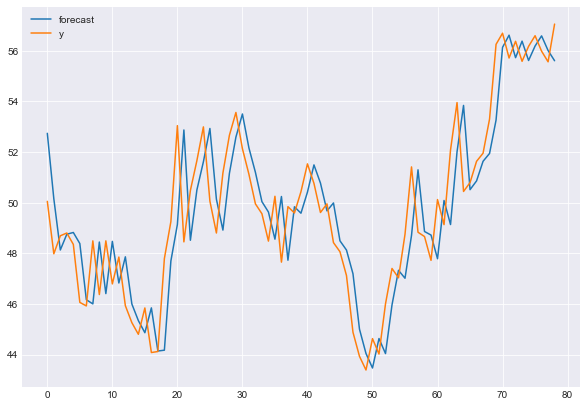

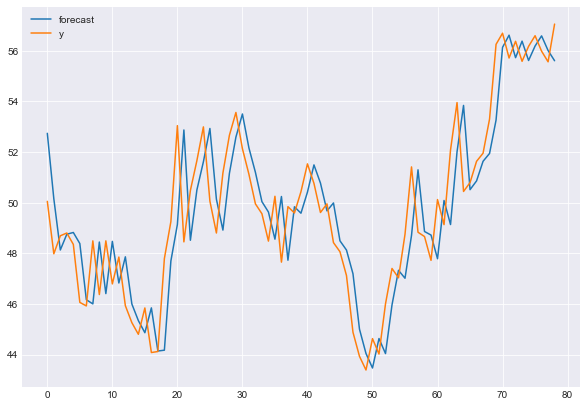

In [46]:
# fit model
model = ARIMA(X, order=(1,1,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1694
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2753.910
Method:                       css-mle   S.D. of innovations              1.230
Date:                Sun, 02 Jan 2022   AIC                           5517.819
Time:                        18:11:56   BIC                           5544.993
Sample:                             1   HQIC                          5527.881
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0168      0.028      0.600      0.549      -0.038       0.072
ar.L1.D.y      0.2734      0.380      0.719      0.472      -0.472       1.019
ma.L1.D.y     -0.3073      0.380     -0.809      0.419      -1.052       0.437
ma.L2.D.y     -0.0131      0.028     -0.461      0.645      -0.069       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6581           +0.0000j            3.6581            0.0000
MA.1            2.8967           +0.0000j            2.8967            0.0000
MA.2          -26.3438           +0.0000j           26.3438            0.5000
-----------------------------------------------------------------------------
"""

# Deployment


In [52]:
#save the model 

import pickle

In [55]:
model = 'trained_model.sav'
pickle.dump(model, open(model, 'wb'))

In [56]:
# loading the save model
loaded_model = pickle.load(open('trained_model.sav', "rb"))